In [1]:
import lmenv
env = lmenv.load('.lmenv')

In [2]:
import os
import numpy as np
import imageio
%matplotlib inline
import matplotlib.pyplot as plt
import lightmetrica as lm
%load_ext lightmetrica_jupyter

In [3]:
lm.init()
lm.log.init('jupyter')
lm.progress.init('jupyter')
lm.info()

[I|0.000] Lightmetrica -- Version 3.0.0 (rev. 70601db) Linux x64


In [4]:
if not lm.Release:
    lm.debug.attach_to_debugger()

In [5]:
lm.comp.load_plugin(os.path.join(env.bin_path, 'functest_renderer_ao'))

[I|0.013] Loading plugin [name='functest_renderer_ao']
[I|0.013] .. Successfully loaded [name='functest_renderer_ao']


In [6]:
# Film for the rendered image
film = lm.load_film('film1', 'bitmap', w=1920, h=1080)

# Pinhole camera
camera = lm.load_camera('camera1', 'pinhole',
    position=[5.101118, 1.083746, -2.756308],
    center=[4.167568, 1.078925, -2.397892],
    up=[0,1,0],
    vfov=43.001194,
    aspect=16/9)

# OBJ model
model = lm.load_model('obj1', 'wavefrontobj',
    path=os.path.join(env.scene_path, 'fireplace_room/fireplace_room.obj'))

# Scene
accel = lm.load_accel('accel', 'sahbvh')
scene = lm.load_scene('scene', 'default', accel=accel)
scene.add_primitive(camera=camera)
scene.add_primitive(model=model)
scene.build()

[I|0.023] Loading asset [name='film1']
[I|0.100] Loading asset [name='camera1']
[I|0.101] Loading asset [name='obj1']
[I|0.101] .. Loading OBJ file [path='fireplace_room.obj']
[I|0.101] .. Loading MTL file [path='fireplace_room.mtl']


[I|0.428] .. Loading texture [path='wood.ppm']
[I|0.519] .. Loading texture [path='leaf.ppm']
[I|0.521] .. Loading texture [path='picture8.ppm']
[I|0.553] .. Loading texture [path='wood5.ppm']
[I|0.605] Loading asset [name='accel']
[I|0.605] Loading asset [name='scene']
[I|0.609] Building acceleration structure [name='accel']
[I|0.609] .. Flattening scene
[I|0.636] .. Building


In [7]:
renderer = lm.load_renderer('renderer', 'ao',
    scene=scene,
    output=film,
    spp=5)
renderer.render()

[I|1.271] Loading asset [name='renderer']


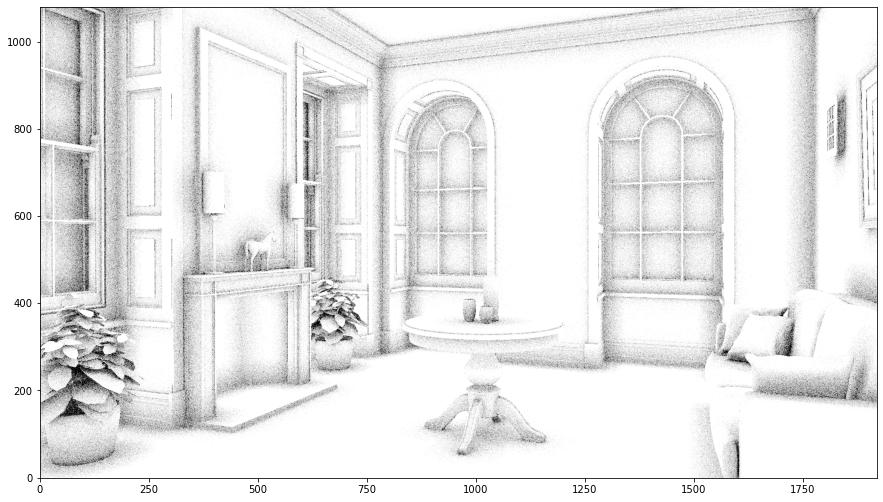

In [8]:
img = np.copy(film.buffer())
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(111)
ax.imshow(np.clip(np.power(img,1/2.2),0,1), origin='lower')
plt.show()